# Risk-return on different portfolios

It is possible to analyze the risk-return profile of different portfolios by combining stocks with different betas. 

In partiulare, the average return of a portfolio composed by two stocks can be computed as:
$$ E(R_p) = w_1 \cdot E(R_1) + w_2 \cdot E(R_2) $$

Where:

- $E(R_p)$ is the expected return of the portfolio
- $w_1$ and $w_2$ are the weights of the two stocks in the portfolio (with $w_1 + w_2 = 1$)
- $E(R_1)$ and $E(R_2)$ are the expected returns of the two stocks
- $R_1$ and $R_2$ are the returns of the two stocks

The risk (standard deviation) of the portfolio can be computed as:
$$ \sigma_p = \sqrt{w_1^2 \cdot \sigma_1^2 + w_2^2 \cdot \sigma_2^2 + 2 \cdot w_1 \cdot w_2 \cdot Cov(R_1, R_2)} $$

Where:
- $\sigma_p$ is the standard deviation of the portfolio
- $\sigma_1$ and $\sigma_2$ are the standard deviations of the two stocks
- $Cov(R_1, R_2)$ is the covariance between the returns of the two stocks
- $w_1$ and $w_2$ are the weights of the two stocks in the portfolio (with $w_1 + w_2 = 1$)


In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
returns_df = pd.read_csv('Outputs/yearly_returns.csv', index_col=0).T

In [14]:
# Import the expected returns of the two stocks computed with the CAPM model
expected_returns_df = pd.read_csv('Outputs/expected_returns.csv')
expected_return_wmt = expected_returns_df.loc[0,'Expected Return']
expected_return_stla = expected_returns_df.loc[1,'Expected Return']

# Calculate the historical standard deviation of the two stocks
historical_std_wmt = returns_df['Walmart'].std()  # Annualized standard deviation
historical_std_stla = returns_df["Stellantis"].iloc[1:].std()  # Annualized standard deviation

# Calculate the historical covariance between the two stocks
historical_cov = returns_df[['Walmart', 'Stellantis']].cov()

# Display the results
print(f"Expected Return Walmart: {expected_return_wmt:.4f}")
print(f"Expected Return Stellantis: {expected_return_stla:.4f}")
print(f"Standard Deviation Walmart: {historical_std_wmt:.4f}")
print(f"Standard Deviation Stellantis: {historical_std_stla:.4f}")
print(f"Covariance Matrix:\n{historical_cov}")


Expected Return Walmart: 0.0797
Expected Return Stellantis: 0.1259
Standard Deviation Walmart: 0.2120
Standard Deviation Stellantis: 0.4754
Covariance Matrix:
             Walmart  Stellantis
Walmart     0.044951   -0.026121
Stellantis -0.026121    0.696050


In [15]:
# Consider a range of portfolio weights for Walmart and Stellantis (in increments of 0.01).
weights = np.linspace(0, 1, 101)
portfolio_returns = [] # List to store portfolio returns
portfolio_stds = [] # List to store portfolio standard deviations

# Iterate through the weights to calculate portfolio returns and standard deviations
for w in weights:
    w_walmart = 1 - w # Weight for Walmart
    w_stellantis = w # Weight for Stellantis
    
    port_return = (w_walmart * expected_return_wmt + w_stellantis * expected_return_stla) * 100 # Portfolio return
    port_variance = (
        w_walmart**2 * (historical_std_wmt*100)**2 +
        w_stellantis**2 * (historical_std_stla*100)**2 +
        2 * w_walmart * w_stellantis * historical_cov.iloc[0,1] # We take from the covariance matrix the covariance between the two stocks
    )
    port_std = np.sqrt(port_variance) # Portfolio standard deviation
    
    # Append the results to the lists
    portfolio_returns.append(port_return)
    portfolio_stds.append(port_std)

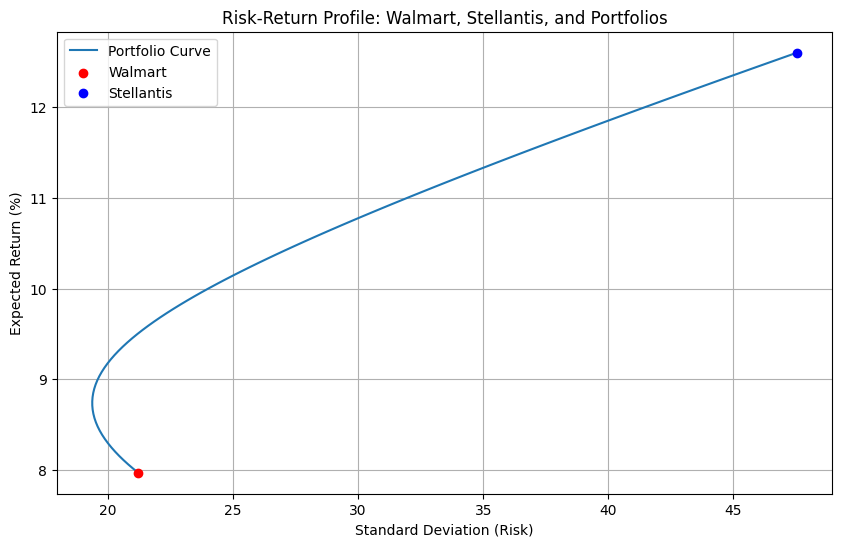

In [16]:
# Display the results with a plot 
plt.figure(figsize=(10, 6))
plt.plot(portfolio_stds, portfolio_returns, label='Portfolio Curve')
plt.scatter(historical_std_wmt*100, expected_return_wmt*100, color='red', label='Walmart', zorder=5)
plt.scatter(historical_std_stla*100, expected_return_stla*100, color='blue', label='Stellantis', zorder=5)
plt.title('Risk-Return Profile: Walmart, Stellantis, and Portfolios')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return (%)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Define the risk-free rate (monthly) for Sharpe Ratio calculation
risk_free_rate = 0.0427 

# Calculate the Sharpe Ratio for each portfolio combination by subtracting the risk-free rate from the portfolio returns and dividing by the portfolio standard deviations
portfolio_returns = np.array(portfolio_returns)
portfolio_stds = np.array(portfolio_stds)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_stds

# Find the index of the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = sharpe_ratios.argmax()
optimal_risky_portfolio_return = portfolio_returns[max_sharpe_idx]
optimal_risky_portfolio_std = portfolio_stds[max_sharpe_idx]

cml_x = np.linspace(0, max(portfolio_stds), 100)
cml_y = risk_free_rate + (optimal_risky_portfolio_return - risk_free_rate) / optimal_risky_portfolio_std * cml_x


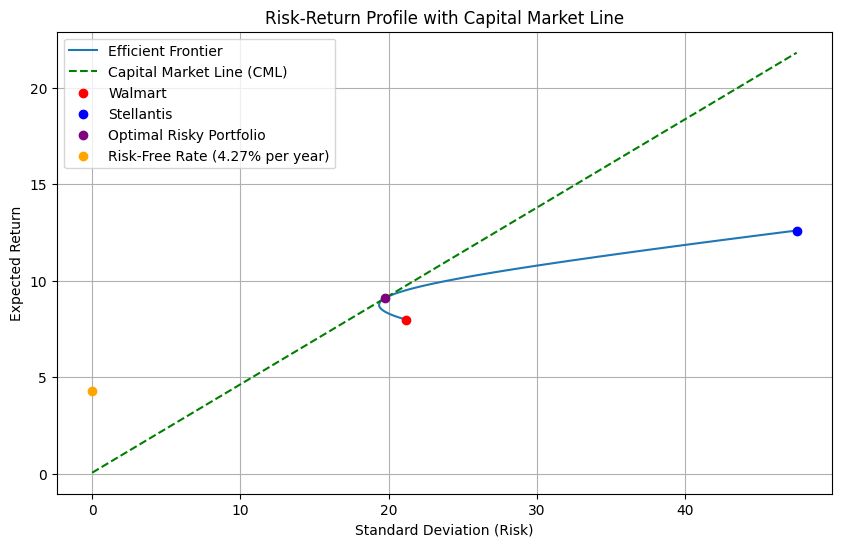

In [19]:
# Plot the efficient frontier and the Capital Market Line (CML)

plt.figure(figsize=(10, 6))
plt.plot(portfolio_stds, portfolio_returns, label='Efficient Frontier')
plt.plot(cml_x, cml_y, label='Capital Market Line (CML)', linestyle='--', color='green')
plt.scatter(historical_std_wmt*100, expected_return_wmt*100, color='red', label='Walmart', zorder=5)
plt.scatter(historical_std_stla*100, expected_return_stla*100, color='blue', label='Stellantis', zorder=5)
plt.scatter(optimal_risky_portfolio_std, optimal_risky_portfolio_return, color='purple', label='Optimal Risky Portfolio', zorder=5)
plt.scatter(0, risk_free_rate*100, color='orange', label='Risk-Free Rate (4.27% per year)', zorder=5)
plt.title('Risk-Return Profile with Capital Market Line')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()